In [1]:
import platform
import datetime
import sys
import os


your_name, your_code, work_counter = "杜培博", 200507340136, 4
print(f'我是：{your_name}，学号：{your_code}，这是我的第 {work_counter} 次作业。')
print('现在是', datetime.datetime.now())
print('我的机器信息如下：')
print(platform.uname())

print('\n当前工作目录：')
print(os.getcwd())
print('\n当前目录的文件信息如下：')
print(os.listdir())
print('\n我安装包的情况:')
!pip list


我是：杜培博，学号：200507340136，这是我的第 4 次作业。
现在是 2021-09-30 23:05:43.012474
我的机器信息如下：
uname_result(system='Windows', node='LAPTOP-5PHEQ8I3', release='10', version='10.0.18362', machine='AMD64', processor='AMD64 Family 23 Model 24 Stepping 1, AuthenticAMD')

当前工作目录：
E:\jupyter\curriculum_code\da_tow\week_04

当前目录的文件信息如下：
['.ipynb_checkpoints', 'Untitled.ipynb', 'Untitled1.ipynb', '普通-36-杜培博.ipynb']

我安装包的情况:
Package                            Version

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.



---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
audioread                          2.1.9
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
baidu-aip                          2.2.18.0
bcrypt                           

# 任务一：一维K中心算法的实现

## 实现k中心算法:计算每个点的距离，找出cluster，然后再转化为计算最小值的问题，求出距离中心最小的那个坐标

Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 261 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 404 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


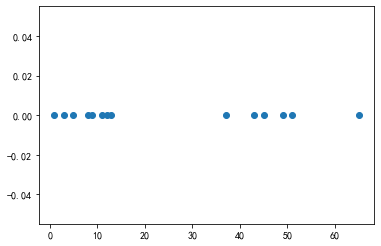

In [2]:
# 输入 人的年龄 组数k 初始中心
# 输出 类的中心，类的元素
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 输入部分
ages = np.array([1, 3, 5, 8, 9, 11, 12, 13, 37, 43, 45, 49, 51, 65])
k = 3

centers_new = [1, 20, 40]  # 迭代起点 实际实现时可以随机选择

# 探索部分
ages_series = pd.Series(ages)
plt.scatter(ages_series, np.zeros(len(ages_series)))  # 画图以后

# 距离表的数据结构
dis_to_cent = np.zeros((len(ages), k))


### 核心代码：centers_new[ii] = cluster[np.argmin(abs(cluster-round(cluster.mean())))]

In [3]:
centers = None
while centers_new!= centers:
# 重复部分 这个需要手动重复，请大家改成自动重复或确定收敛条件
    centers = centers_new.copy()  # 注意python的赋值过程，进行展开讲解，== is 和复制方式
    for ii in range(k):
        dis_to_cent[:, ii] = np.abs(ages - centers[ii])

    clusters = dis_to_cent.argmin(axis=1)

    for ii in range(k):
        cluster = ages[clusters == ii]
        centers_new[ii] = cluster[np.argmin(abs(cluster-round(cluster.mean())))]
        # centers_new[ii] = round(cluster.mean())

print(centers, centers_new)
print('centers_new==centers?', centers_new == centers)
print()


[3, 11, 49] [3, 11, 49]
centers_new==centers? True



## 两种方法的区别：1，原始的方法计算cluster中心时候，形成的聚类中心有可能是已经存在的点，也可能是不存在的点，当是不存在的点的时候，就是一个新的点，然后再次计算聚类中心，当计算出来新的聚类中心的时候，上一次计算出来的聚类中心就会消失。2，当是K中心算法时，就会自动选择已经存在的点当作聚类中心，这样更不容易受到噪声的影响。

# 任务二：K均值调包


In [4]:
# 导入包
from sklearn.cluster import KMeans   # 算法
from sklearn.datasets import load_iris     # 数据集
from sklearn.model_selection import train_test_split    # 数据集划分
from sklearn.metrics import accuracy_score     #评估
from sklearn.preprocessing import StandardScaler   # 标准化
from sklearn.model_selection import GridSearchCV   # 交叉验证网格搜索(没用到）
import numpy as np
import pandas as pd

In [5]:
iris = load_iris()    # 加载数据集

In [6]:
# 获取特征值和目标值，目标值在这里没什么用
X = iris.data[:, 1:3]
Y = iris.target

In [7]:
# 数据分割，测试集为0.2，随机种子2021
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

In [8]:
# 实例化一个转换器，在这里使用的是标准化，没有使用归一化，归一化鲁棒性差
transfer = StandardScaler()
x_train = transfer.fit_transform(X_train)
x_test = transfer.fit_transform(x_test)
# lis = [x for x in range(1,100)]
# lis

In [9]:
# 实例化一个估计器
estimator = KMeans(n_clusters=3)

In [10]:
# 训练模型
estimator.fit(x_train)

KMeans(n_clusters=3)

In [11]:
# param_dist  = {"n_clusters":lis}

In [12]:
# 交叉验证网格搜索
# estimator = GridSearchCV(estimator, param_dist , cv=3)

In [13]:
# best_estimator = estimator.best_estimator_
# print(best_estimator)

In [14]:
# 模型预测
y_pre = estimator.predict(x_test)
y_pre

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 1])

In [15]:
print("模型的准确率为：", accuracy_score(y_test, y_pre))

模型的准确率为： 0.06666666666666667


# 算法提升

## 1，可视化

In [16]:
# 定义了一个函数进行训练和预测
def Kmeans_fun(k):
    # 实例化一个估计器
    estimator = KMeans(n_clusters=k)
    # y_pre = KMeans(n_clusters=k, random_state=2021).fit_predict(X)
    estimator.fit(X_train)
    y_pre = estimator.predict(X)
    return y_pre

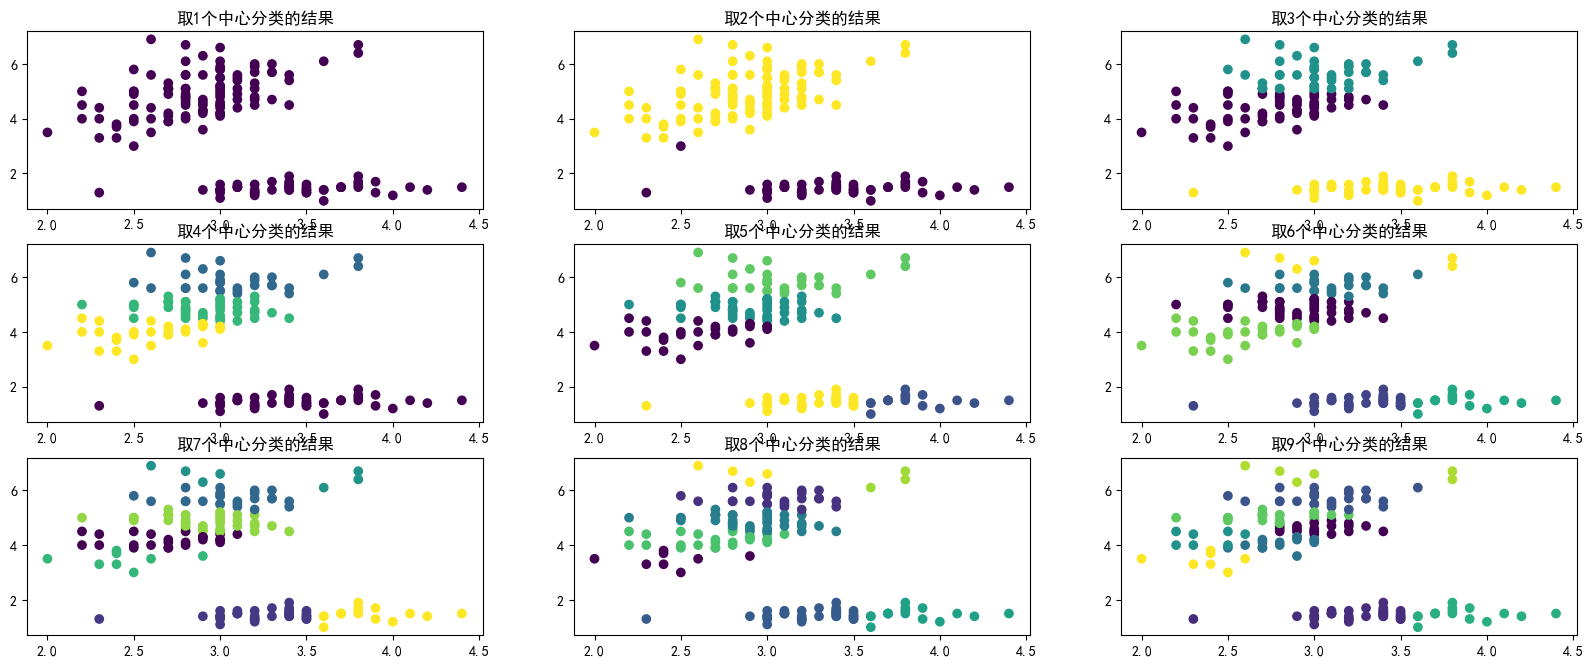

In [17]:
cou = 1
plt.figure(figsize=(20, 8), dpi=100)
for i in range(1, 10):
#     print(i)
    y_pre = Kmeans_fun(i)
#     print(y_pre)
    plt.subplot(330 + cou)
    plt.scatter(X[:, 0], X[:, 1], c=y_pre)
    cou += 1
    plt.title("取{0}个中心分类的结果".format(i))
    # print(y_pre)

plt.show()

## 2，手肘发：肉眼观察K，将每个中心的E进行可视化，选取拐点

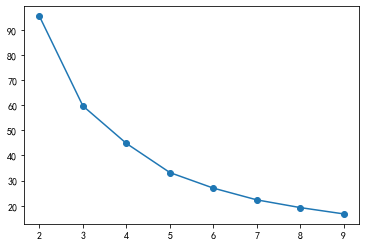

In [18]:
SSE = []
for i in range(2, 10):
    estimator = KMeans(n_clusters=i)
    estimator.fit(x_train, y_train)
    SSE.append(estimator.inertia_)

X = range(2,10)
plt.scatter(X, SSE)
plt.plot(X, SSE)

### 由此图可以看出，当K等于4或5时，下降最快，所以应该取三个中心作为分为标准

## 3，轮廓系数

### 轮廓系数的值是介于 [-1,1] ，越趋近于1代表内聚度和分离度都相对较优。
### 计算 簇内不相似度a(i) ：i向量到同簇内其他点不相似程度的平均值，体现凝聚度
### 计算 簇间不相似度b(i) ：i向量到其他簇的平均不相似程度的最小值，体现分离度
### si接近1，则说明样本i聚类合理；si接近-1，则说明样本i更应该分类到另外的簇；若si 近似为0，则说明样本i在两个簇的边界上。
### 将所有点的轮廓系数求平均，就是该聚类结果总的轮廓系数

In [19]:
from sklearn import metrics

In [20]:
def Kmeans_fun(k):
    # 实例化一个估计器
    estimator = KMeans(n_clusters=k)
    # y_pre = KMeans(n_clusters=k, random_state=2021).fit_predict(X)
    estimator.fit(X_train)
    res = estimator.labels_
    return res

In [21]:
lis = []
for i in range(2, 100):
    res_label = Kmeans_fun(i)
#     print(res_label)
    lis.append(metrics.silhouette_score(X_train, res_label, metric='euclidean', sample_size=None, random_state=None))
#     print("分{0}个中心的轮廓系数为：".format(i), metrics.silhouette_score(X_train, res_label, metric='euclidean', sample_size=None, random_state=None))


Text(0.5, 1.0, '轮廓系数和聚类中心的关系')

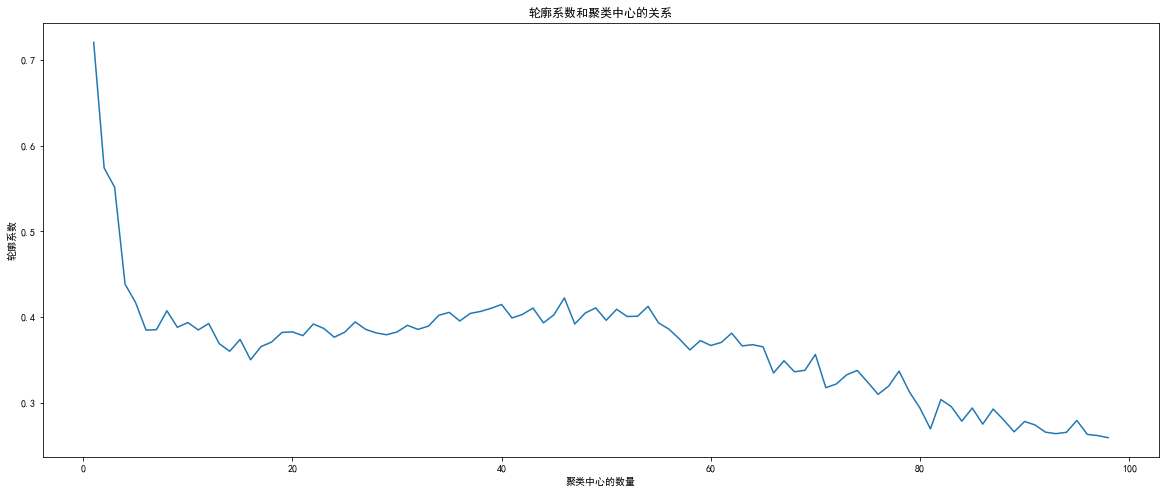

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(list(range(1,99)),lis)
plt.xlabel("聚类中心的数量")
plt.ylabel("轮廓系数")
plt.title("轮廓系数和聚类中心的关系")
# len(lis)

# 4，DBSCAN聚类算法

### 个人理解；算法里面有两个参数，一个是半径，另一个是数量，根据半径划分范围，在这个范围内的数据可以称为直接密度可达，然后取在这个范围内的每个数据根据半径再继续划分范围，从而达到“传播”的效果

### 算法优点：
### 不需要事先知道要形成的簇类的数量。
### 可以发现任意形状的簇类。
### 对噪声敏感，更容易找到噪声

In [1]:
from sklearn.cluster import DBSCAN
 
# 设置半径为10，最小样本量为2，训练
db = DBSCAN(eps=0.3, min_samples=2).fit(X_train)
labels = db.labels_ 
# train = pd.Series(X_train[:, 0])
# labels

# 可视化
plt.figure(figsize=(20, 8))
plt.scatter(X_train[:, 0], X_train[:, 1] ,c=labels, s=100)

NameError: name 'X_train' is not defined

# 任务三：Numpy

### numpy.char.add() 函数依次对两个数组的元素进行字符串连接。

In [24]:
import numpy as np 
 
print ('连接两个字符串：')
print (np.char.add(['hello'],[' xyz']))
print ('\n')
 
print ('连接示例：')
print (np.char.add(['hello', 'hi'],[' abc', ' xyz']))

连接两个字符串：
['hello xyz']


连接示例：
['hello abc' 'hi xyz']


### numpy.char.center() 函数用于将字符串居中，并使用指定字符在左侧和右侧进行填充。

In [25]:
import numpy as np 
 
# np.char.center(str , width,fillchar) ：
# str: 字符串，width: 长度，fillchar: 填充字符
print (np.char.center('Runoob', 20,fillchar = '*'))

*******Runoob*******


In [26]:
# numpy.char.capitalize() 函数将字符串的第一个字母转换为大写：
import numpy as np 
 
print (np.char.capitalize('runoob'))

Runoob


In [27]:
# numpy.char.title() 函数将字符串的每个单词的第一个字母转换为大写：
import numpy as np
 
print (np.char.title('i like runoob'))

I Like Runoob


In [28]:
# numpy.char.lower() 函数对数组的每个元素转换为小写。它对每个元素调用 str.lower
import numpy as np 
 
#操作数组
print (np.char.lower(['RUNOOB','GOOGLE']))
 
# 操作字符串
print (np.char.lower('RUNOOB'))

['runoob' 'google']
runoob


In [29]:
# numpy.char.upper() 函数对数组的每个元素转换为大写。它对每个元素调用 str.upper。
import numpy as np 
 
#操作数组
print (np.char.upper(['runoob','google']))
 
# 操作字符串
print (np.char.upper('runoob'))

['RUNOOB' 'GOOGLE']
RUNOOB


In [30]:
# numpy.char.split() 通过指定分隔符对字符串进行分割，并返回数组。默认情况下，分隔符为空格。
import numpy as np 
 
# 分隔符默认为空格
print (np.char.split ('i like runoob?'))
# 分隔符为 .
print (np.char.split ('www.runoob.com', sep = '.'))

['i', 'like', 'runoob?']
['www', 'runoob', 'com']


In [31]:
# numpy.char.strip() 函数用于移除开头或结尾处的特定字符。
import numpy as np 
 
# 移除字符串头尾的 a 字符
print (np.char.strip('ashok arunooba','a'))
 
# 移除数组元素头尾的 a 字符
print (np.char.strip(['arunooba','admin','java'],'a'))

shok arunoob
['runoob' 'dmin' 'jav']


In [32]:
# numpy.char.join() 函数通过指定分隔符来连接数组中的元素或字符串
import numpy as np 
 
# 操作字符串
print (np.char.join(':','runoob'))
 
# 指定多个分隔符操作数组元素
print (np.char.join([':','-'],['runoob','google']))

r:u:n:o:o:b
['r:u:n:o:o:b' 'g-o-o-g-l-e']


In [33]:
# numpy.char.replace() 函数使用新字符串替换字符串中的所有子字符串。
import numpy as np 
 
print (np.char.replace ('i like runoob', 'oo', 'cc'))

i like runccb


In [34]:
# numpy.floor() 返回小于或者等于指定表达式的最大整数，即向下取整。
import numpy as np
 
a = np.array([-1.7,  1.5,  -0.2,  0.6,  10])
print ('提供的数组：')
print (a)
print ('\n')
print ('修改后的数组：')
print (np.floor(a))

提供的数组：
[-1.7  1.5 -0.2  0.6 10. ]


修改后的数组：
[-2.  1. -1.  0. 10.]


In [35]:
# numpy.ceil() 返回大于或者等于指定表达式的最小整数，即向上取整。
import numpy as np
 
a = np.array([-1.7,  1.5,  -0.2,  0.6,  10])  
print  ('提供的数组：')
print (a)
print ('\n')
print ('修改后的数组：')
print (np.ceil(a))

提供的数组：
[-1.7  1.5 -0.2  0.6 10. ]


修改后的数组：
[-1.  2. -0.  1. 10.]


In [36]:
# numpy.power() 函数将第一个输入数组中的元素作为底数，计算它与第二个输入数组中相应元素的幂
import numpy as np 
 
a = np.array([10,100,1000])  
print ('我们的数组是；')
print (a)
print ('\n') 
print ('调用 power 函数：')
print (np.power(a,2))
print ('\n')
print ('第二个数组：')
b = np.array([1,2,3])  
print (b)
print ('\n')
print ('再次调用 power 函数：')
print (np.power(a,b))

我们的数组是；
[  10  100 1000]


调用 power 函数：
[    100   10000 1000000]


第二个数组：
[1 2 3]


再次调用 power 函数：
[        10      10000 1000000000]


In [37]:
# numpy.mod() 计算输入数组中相应元素的相除后的余数。 函数 numpy.remainder() 也产生相同的结果。
import numpy as np
 
a = np.array([10,20,30]) 
b = np.array([3,5,7])  
print ('第一个数组：')
print (a)
print ('\n')
print ('第二个数组：')
print (b)
print ('\n')
print ('调用 mod() 函数：')
print (np.mod(a,b))
print ('\n')
print ('调用 remainder() 函数：')
print (np.remainder(a,b))

第一个数组：
[10 20 30]


第二个数组：
[3 5 7]


调用 mod() 函数：
[1 0 2]


调用 remainder() 函数：
[1 0 2]


### 统计函数

In [38]:
# numpy.amin() 用于计算数组中的元素沿指定轴的最小值。
# numpy.amax() 用于计算数组中的元素沿指定轴的最大值。
import numpy as np 
 
a = np.array([[3,7,5],[8,4,3],[2,4,9]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 amin() 函数：')
print (np.amin(a,1))
print ('\n')
print ('再次调用 amin() 函数：')
print (np.amin(a,0))
print ('\n')
print ('调用 amax() 函数：')
print (np.amax(a))
print ('\n')
print ('再次调用 amax() 函数：')
print (np.amax(a, axis =  0))

我们的数组是：
[[3 7 5]
 [8 4 3]
 [2 4 9]]


调用 amin() 函数：
[3 3 2]


再次调用 amin() 函数：
[2 4 3]


调用 amax() 函数：
9


再次调用 amax() 函数：
[8 7 9]


In [39]:
# numpy.ptp()函数计算数组中元素最大值与最小值的差（最大值 - 最小值）
import numpy as np 
 
a = np.array([[3,7,5],[8,4,3],[2,4,9]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 ptp() 函数：')
print (np.ptp(a))
print ('\n')
print ('沿轴 1 调用 ptp() 函数：')
print (np.ptp(a, axis =  1))
print ('\n')
print ('沿轴 0 调用 ptp() 函数：')
print (np.ptp(a, axis =  0))

我们的数组是：
[[3 7 5]
 [8 4 3]
 [2 4 9]]


调用 ptp() 函数：
7


沿轴 1 调用 ptp() 函数：
[4 5 7]


沿轴 0 调用 ptp() 函数：
[6 3 6]


In [40]:
# numpy.mean() 函数返回数组中元素的算术平均值。 如果提供了轴，则沿其计算
import numpy as np 
 
a = np.array([[1,2,3],[3,4,5],[4,5,6]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 mean() 函数：')
print (np.mean(a))
print ('\n')
print ('沿轴 0 调用 mean() 函数：')
print (np.mean(a, axis =  0))
print ('\n')
print ('沿轴 1 调用 mean() 函数：')
print (np.mean(a, axis =  1))

我们的数组是：
[[1 2 3]
 [3 4 5]
 [4 5 6]]


调用 mean() 函数：
3.6666666666666665


沿轴 0 调用 mean() 函数：
[2.66666667 3.66666667 4.66666667]


沿轴 1 调用 mean() 函数：
[2. 4. 5.]


### 标准差和方差

In [41]:
# 标准差，标准差是方差的算术平方根
import numpy as np 
 
print (np.std([1,2,3,4]))

1.118033988749895


In [42]:
# 方差，统计中的方差（样本方差）是每个样本值与全体样本值的平均数之差的平方值的平均数，即 mean((x - x.mean())** 2)。
import numpy as np
 
print (np.var([1,2,3,4]))

1.25
